In [11]:
import numpy as np
import cv2
import os
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D, MaxPooling2D, Dropout, Activation
from tensorflow.keras import layers
from keras.utils import to_categorical

**Load Images**

In [13]:
img_dir = "C:/Users/kaoti/Desktop/Github/OneFish-Disseration-Project/Model/img"

categories =[] # creates categories based on the names of the folders

for x in os.listdir(img_dir):
    categories.append(x)
print(categories[1])

Acipenseridae (Sturgeon)


In [14]:
#for fishCategory in categories:
    #path = os.path.join(img_dir,fishCategory)
    #for img in os.listdir(path):
        #img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
       # plt.imshow(img_arr, cmap ="gray")
       # plt.show()
       # break
   # break

In [15]:
#img_size =255 # x and y of reshapping image

#new_arr = cv2.resize(img_arr,(img_size,img_size))
#plt.imshow(new_arr,cmap="gray")
#plt.show()

In [16]:
#loader
batch_size = 32
img_h, img_w = 255,255

train_ds = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    validation_split=0.2,
    subset="training",
    seed =123,
    image_size=(img_h,img_w),
    batch_size= batch_size)

Found 7482 files belonging to 30 classes.
Using 5986 files for training.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  img_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_h, img_w),
  batch_size=batch_size)

Found 7482 files belonging to 30 classes.
Using 1496 files for validation.


In [18]:
class_names = train_ds.class_names
print(class_names)

['Abramis brama (Common bream)', 'Acipenseridae (Sturgeon)', 'Anguilla anguilla (European eel)', 'Aspius aspius (Asp)', 'Barbus barbus (Common barbel)', 'Blicca bjoerkna (silver bream)', 'Carassius carassius (Crucian carp)', 'Carassius gibelio (Prussian carp)', 'Ctenopharyngodon idella (Grass carp)', 'Cyprinus carpio (Common carp)', 'Esox lucius (Northern pike)', 'Gasterosteus aculeatus (Three-spined stickleback)', 'Gobio gobio (gudgeon)', 'Gymnocephalus cernuus (Eurasian ruffe)', 'Lepomis gibbosus (The pumpkinseed)', 'Leuciscus cephalus (common chub)', 'Leuciscus idus (Ide)', 'Leuciscus leuciscus (Common dace)', 'Neogobius fluviatilis (Monkey goby)', "Neogobius kessleri (Kessler's goby)", 'Neogobius melanostomus (Round goby)', 'Perca fluviatilis (European perch)', 'Rhodeus amarus (European bitterling)', 'Rutilus rutilus (Common roach)', 'Salmo trutta subsp. fario (Brown Trout)', 'Sander lucioperca (Zander)', 'Scardinius erythrophthalmus (Rudd)', 'Silurus glanis (Wels catfish)', 'Tinca

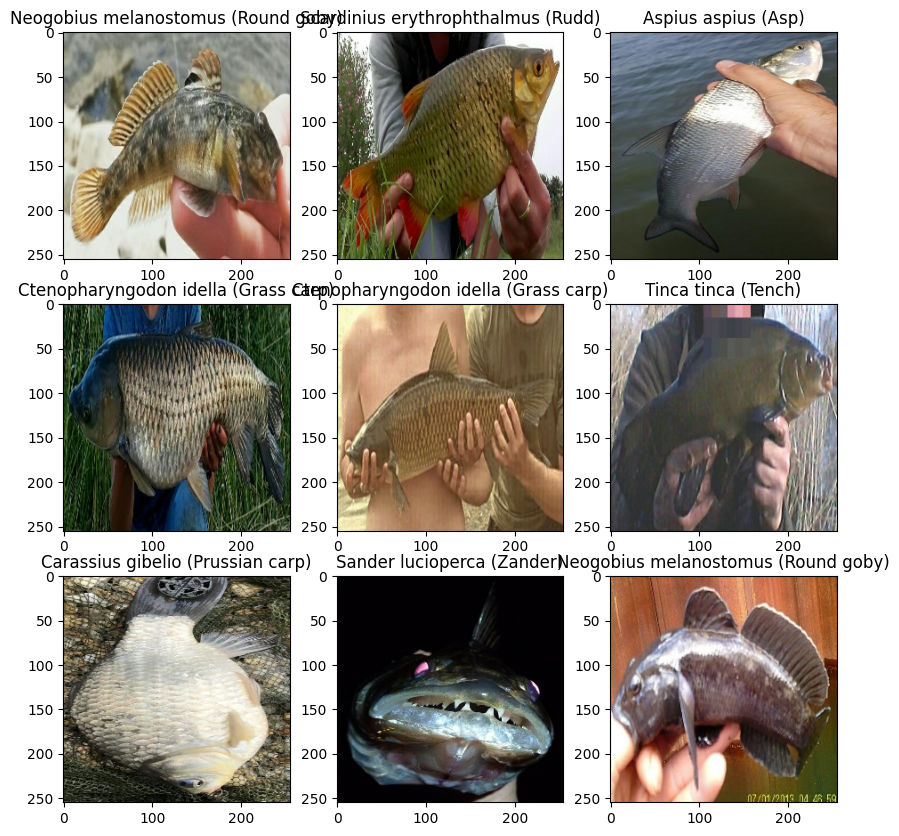

In [19]:
plt.figure(figsize = (10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i +1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs = epochs)

Epoch 1/10
188/188 [==============================] - 186s 988ms/step - loss: 0.5540 - accuracy: 0.8354 - val_loss: 4.6767 - val_accuracy: 0.2513
Epoch 2/10
188/188 [==============================] - 167s 889ms/step - loss: 0.3181 - accuracy: 0.9023 - val_loss: 5.2295 - val_accuracy: 0.2620
Epoch 3/10
188/188 [==============================] - 178s 949ms/step - loss: 0.1531 - accuracy: 0.9549 - val_loss: 6.1905 - val_accuracy: 0.2594
Epoch 4/10
120/188 [==================>...........] - ETA: 1:11 - loss: 0.0989 - accuracy: 0.9742

KeyboardInterrupt: 